# Mini-Projets

## Exercice 1 : Exploration initiale

In [1]:
#Charger le fichier dans un DataFrame
import pandas as pd
database = pd.read_csv("C:/Users/HP/Desktop/DATA ANALYST/5-PYTHON/Formation Python/Mini_Projet/ventes_magasin - ventes_magasin.csv.csv")

In [2]:
#databaseAfficher les premières lignes 
database.head()

,Date,Magasin,Produit,Catégorie,Prix,Quantité,Remise (%)
0,2024-01-01,Bukavu,Écouteurs JBL,Accessoires,866,2,NaN
1,2024-01-02,Goma,Imprimante Canon,Accessoires,169,2,0.0
2,2024-01-03,Goma,Samsung Galaxy,Accessoires,914,4,10.0
3,2024-01-04,Lubumbashi,Écouteurs JBL,Imprimantes,1171,2,NaN
4,2024-01-05,Goma,Clé USB,Ordinateurs,600,1,15.0


In [3]:
# Nombre de lignes et colonnes de la base de données
database.shape

(20, 7)

In [4]:
# Quelles sont les colonnes ? 
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        20 non-null     object 
 1   Magasin     20 non-null     object 
 2   Produit     20 non-null     object 
 3   Catégorie   20 non-null     object 
 4   Prix        20 non-null     int64  
 5   Quantité    20 non-null     int64  
 6   Remise (%)  15 non-null     float64
dtypes: float64(1), int64(2), object(4)
memory usage: 1.2+ KB


In [5]:
database.columns# autres méthode pour afficher les colonnes

Index(['Date', 'Magasin', 'Produit', 'Catégorie', 'Prix', 'Quantité',
       'Remise (%)'],
      dtype='object')

## Exercice 2 : Calculs simples

In [6]:
# Créer une nouvelle base de données avec la colonne Total_Vente “Total_Vente” = Prix × Quantité 
database_1 = database.copy()
database_1["Total_Vente"] = database_1["Prix"] * database_1["Quantité"]
pd.set_option('display.max_columns', None)     # Affiche toutes les colonnes
pd.set_option('display.expand_frame_repr', False)  # Empêche les retours à la ligne
pd.set_option('display.width', 0)  
print(database_1)

          Date     Magasin           Produit    Catégorie  Prix  Quantité  Remise (%)  Total_Vente
0   2024-01-01      Bukavu     Écouteurs JBL  Accessoires   866         2         NaN         1732
1   2024-01-02        Goma  Imprimante Canon  Accessoires   169         2         0.0          338
2   2024-01-03        Goma    Samsung Galaxy  Accessoires   914         4        10.0         3656
3   2024-01-04  Lubumbashi     Écouteurs JBL  Imprimantes  1171         2         NaN         2342
4   2024-01-05        Goma           Clé USB  Ordinateurs   600         1        15.0          600
5   2024-01-06    Kinshasa           Clé USB  Accessoires  1285         5         0.0         6425
6   2024-01-07  Lubumbashi    Samsung Galaxy   Téléphones   673         1        10.0          673
7   2024-01-08        Goma           Clé USB  Ordinateurs   230         4        10.0          920
8   2024-01-09  Lubumbashi  Imprimante Canon  Imprimantes   168         3         0.0          504
9   2024-0

In [7]:
# Ajouter la colonne Prix_net après remise
database_1["Prix_net"] = database_1["Prix"] * (1 - database_1["Remise (%)"].fillna(0) / 100)
print(database_1)

          Date     Magasin           Produit    Catégorie  Prix  Quantité  Remise (%)  Total_Vente  Prix_net
0   2024-01-01      Bukavu     Écouteurs JBL  Accessoires   866         2         NaN         1732    866.00
1   2024-01-02        Goma  Imprimante Canon  Accessoires   169         2         0.0          338    169.00
2   2024-01-03        Goma    Samsung Galaxy  Accessoires   914         4        10.0         3656    822.60
3   2024-01-04  Lubumbashi     Écouteurs JBL  Imprimantes  1171         2         NaN         2342   1171.00
4   2024-01-05        Goma           Clé USB  Ordinateurs   600         1        15.0          600    510.00
5   2024-01-06    Kinshasa           Clé USB  Accessoires  1285         5         0.0         6425   1285.00
6   2024-01-07  Lubumbashi    Samsung Galaxy   Téléphones   673         1        10.0          673    605.70
7   2024-01-08        Goma           Clé USB  Ordinateurs   230         4        10.0          920    207.00
8   2024-01-09  Lub

In [8]:
# Traitement des valeurs manquantes 
database_1["Remise (%)"] = database_1["Remise (%)"].fillna(0)
print(database_1)

          Date     Magasin           Produit    Catégorie  Prix  Quantité  Remise (%)  Total_Vente  Prix_net
0   2024-01-01      Bukavu     Écouteurs JBL  Accessoires   866         2         0.0         1732    866.00
1   2024-01-02        Goma  Imprimante Canon  Accessoires   169         2         0.0          338    169.00
2   2024-01-03        Goma    Samsung Galaxy  Accessoires   914         4        10.0         3656    822.60
3   2024-01-04  Lubumbashi     Écouteurs JBL  Imprimantes  1171         2         0.0         2342   1171.00
4   2024-01-05        Goma           Clé USB  Ordinateurs   600         1        15.0          600    510.00
5   2024-01-06    Kinshasa           Clé USB  Accessoires  1285         5         0.0         6425   1285.00
6   2024-01-07  Lubumbashi    Samsung Galaxy   Téléphones   673         1        10.0          673    605.70
7   2024-01-08        Goma           Clé USB  Ordinateurs   230         4        10.0          920    207.00
8   2024-01-09  Lub

In [9]:
# Trier les ventes du plus grand au plus petit chiffre d'affaires 
database_1 = database_1.sort_values(by="Total_Vente", ascending=False)
print(database_1)

          Date     Magasin           Produit    Catégorie  Prix  Quantité  Remise (%)  Total_Vente  Prix_net
13  2024-01-14      Bukavu  Imprimante Canon  Ordinateurs  1380         5         0.0         6900   1380.00
5   2024-01-06    Kinshasa           Clé USB  Accessoires  1285         5         0.0         6425   1285.00
2   2024-01-03        Goma    Samsung Galaxy  Accessoires   914         4        10.0         3656    822.60
16  2024-01-17  Lubumbashi  Imprimante Canon   Téléphones  1336         2         0.0         2672   1336.00
10  2024-01-11  Lubumbashi  Imprimante Canon   Téléphones   469         5         0.0         2345    469.00
3   2024-01-04  Lubumbashi     Écouteurs JBL  Imprimantes  1171         2         0.0         2342   1171.00
0   2024-01-01      Bukavu     Écouteurs JBL  Accessoires   866         2         0.0         1732    866.00
15  2024-01-16  Lubumbashi     Écouteurs JBL  Accessoires  1348         1        10.0         1348   1213.20
17  2024-01-18     

In [10]:
# Importer la base de données en fichier Excel
database_1.to_excel("Ventes_magasin.xlsx", index=False)

## Exercice 3 : Analyse par magasin

In [11]:
# le magasin qui a vendu le plus
vente_par_magasin = database_1.groupby("Magasin")["Total_Vente"].sum().sort_values(ascending=False)
print(vente_par_magasin.head(1))

Magasin
Bukavu    10930
Name: Total_Vente, dtype: int64


In [12]:
# Chiffre d'affaire par magasin
vente_par_magasin = database_1.groupby("Magasin")["Total_Vente"].sum().sort_values(ascending=False)
print(vente_par_magasin)

Magasin
Bukavu        10930
Lubumbashi     9884
Kinshasa       8507
Goma           7840
Name: Total_Vente, dtype: int64


In [13]:
# Quel produit est le plus vendu à Kinshasa 
ventes_kinshasa = database_1[database_1["Magasin"] == "Kinshasa"]
produit_plus_vendu = ventes_kinshasa.groupby("Produit")["Quantité"].sum().sort_values(ascending=False)
print(produit_plus_vendu)

Produit
Clé USB           6
Samsung Galaxy    4
Name: Quantité, dtype: int64


## Exercice 4 : Valeurs manquantes

In [14]:
# Simuler des valeurs manquantes dans "Remise (%)" 
database_1["Remise (%)"] = database_1["Remise (%)"].fillna(5) # en supposant que la remise est de 5%
print(database_1)

          Date     Magasin           Produit    Catégorie  Prix  Quantité  Remise (%)  Total_Vente  Prix_net
13  2024-01-14      Bukavu  Imprimante Canon  Ordinateurs  1380         5         0.0         6900   1380.00
5   2024-01-06    Kinshasa           Clé USB  Accessoires  1285         5         0.0         6425   1285.00
2   2024-01-03        Goma    Samsung Galaxy  Accessoires   914         4        10.0         3656    822.60
16  2024-01-17  Lubumbashi  Imprimante Canon   Téléphones  1336         2         0.0         2672   1336.00
10  2024-01-11  Lubumbashi  Imprimante Canon   Téléphones   469         5         0.0         2345    469.00
3   2024-01-04  Lubumbashi     Écouteurs JBL  Imprimantes  1171         2         0.0         2342   1171.00
0   2024-01-01      Bukavu     Écouteurs JBL  Accessoires   866         2         0.0         1732    866.00
15  2024-01-16  Lubumbashi     Écouteurs JBL  Accessoires  1348         1        10.0         1348   1213.20
17  2024-01-18     

In [15]:
# ● Remplacer les valeurs manquantes par la moyenne
remise_moyen = database_1["Remise (%)"].mean() # Calcul de la moyenne (en ignorant les NaN)
database_1["Remise (%)"] = database_1["Remise (%)"].fillna(remise_moyen) # Remplacement des NaN par la moyenne
print(database_1)

          Date     Magasin           Produit    Catégorie  Prix  Quantité  Remise (%)  Total_Vente  Prix_net
13  2024-01-14      Bukavu  Imprimante Canon  Ordinateurs  1380         5         0.0         6900   1380.00
5   2024-01-06    Kinshasa           Clé USB  Accessoires  1285         5         0.0         6425   1285.00
2   2024-01-03        Goma    Samsung Galaxy  Accessoires   914         4        10.0         3656    822.60
16  2024-01-17  Lubumbashi  Imprimante Canon   Téléphones  1336         2         0.0         2672   1336.00
10  2024-01-11  Lubumbashi  Imprimante Canon   Téléphones   469         5         0.0         2345    469.00
3   2024-01-04  Lubumbashi     Écouteurs JBL  Imprimantes  1171         2         0.0         2342   1171.00
0   2024-01-01      Bukavu     Écouteurs JBL  Accessoires   866         2         0.0         1732    866.00
15  2024-01-16  Lubumbashi     Écouteurs JBL  Accessoires  1348         1        10.0         1348   1213.20
17  2024-01-18     

In [16]:
#Vérifier les types de chaque colonne après
database_1.dtypes

Date            object
Magasin         object
Produit         object
Catégorie       object
Prix             int64
Quantité         int64
Remise (%)     float64
Total_Vente      int64
Prix_net       float64
dtype: object

In [17]:
#Vérifier les types de chaque colonne après
database_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 13 to 9
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         20 non-null     object 
 1   Magasin      20 non-null     object 
 2   Produit      20 non-null     object 
 3   Catégorie    20 non-null     object 
 4   Prix         20 non-null     int64  
 5   Quantité     20 non-null     int64  
 6   Remise (%)   20 non-null     float64
 7   Total_Vente  20 non-null     int64  
 8   Prix_net     20 non-null     float64
dtypes: float64(2), int64(3), object(4)
memory usage: 1.6+ KB


## Exercice 5 : GroupBy avancé

In [18]:
# Moyenne de prix par catégorie 
moyenne_prix_par_categorie = database_1.groupby("Catégorie")["Prix"].mean()
print(moyenne_prix_par_categorie)

Catégorie
Accessoires    862.571429
Imprimantes    790.666667
Ordinateurs    736.666667
Téléphones     689.857143
Name: Prix, dtype: float64


In [19]:
# Total des ventes par mois 
database_1["Date"] = pd.to_datetime(database_1["Date"]) # convertir la colonne "Date" en format datetime
database_1["Mois"] = database_1["Date"].dt.to_period("M") # extraire le mois (année-mois)
total_par_mois = database_1.groupby("Mois")["Total_Vente"].sum() # total des ventes par mois
print(total_par_mois)

Mois
2024-01    37161
Freq: M, Name: Total_Vente, dtype: int64


In [20]:
# Nombre de ventes par produit
ventes_par_produit = database_1.groupby("Produit")["Quantité"].sum()# Nombre total d’unités vendues par produit
print(ventes_par_produit)

Produit
Clé USB             12
Imprimante Canon    23
Laptop HP            1
Samsung Galaxy       9
Écouteurs JBL        8
Name: Quantité, dtype: int64


In [21]:
# le nombre d’opérations (lignes de vente) par produit :
nombre_lignes_par_produit = database_1["Produit"].value_counts()
print(nombre_lignes_par_produit)

Produit
Imprimante Canon    7
Clé USB             5
Écouteurs JBL       4
Samsung Galaxy      3
Laptop HP           1
Name: count, dtype: int64


## VISUALISATION

# Représenter graphiquement les ventes par magasin

In [22]:
# Importation des bibliothèques seaborn, numpy et matplotlib
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt 

In [23]:
# Calacul de la colonne Total_net
database_1["Total_net"] = database_1["Prix_net"] * database_1["Quantité"]
database_1

,Date,Magasin,Produit,Catégorie,Prix,Quantité,Remise (%),Total_Vente,Prix_net,Mois,Total_net
13,2024-01-14,Bukavu,Imprimante Canon,Ordinateurs,1380,5,0.0,6900,1380.00,2024-01,6900.00
5,2024-01-06,Kinshasa,Clé USB,Accessoires,1285,5,0.0,6425,1285.00,2024-01,6425.00
2,2024-01-03,Goma,Samsung Galaxy,Accessoires,914,4,10.0,3656,822.60,2024-01,3290.40
16,2024-01-17,Lubumbashi,Imprimante Canon,Téléphones,1336,2,0.0,2672,1336.00,2024-01,2672.00
10,2024-01-11,Lubumbashi,Imprimante Canon,Téléphones,469,5,0.0,2345,469.00,2024-01,2345.00
3,2024-01-04,Lubumbashi,Écouteurs JBL,Imprimantes,1171,2,0.0,2342,1171.00,2024-01,2342.00
0,2024-01-01,Bukavu,Écouteurs JBL,Accessoires,866,2,0.0,1732,866.00,2024-01,1732.00
15,2024-01-16,Lubumbashi,Écouteurs JBL,Accessoires,1348,1,10.0,1348,1213.20,2024-01,1213.20
17,2024-01-18,Bukavu,Laptop HP,Accessoires,1265,1,0.0,1265,1265.00,2024-01,1265.00
14,2024-01-15,Kinshasa,Samsung Galaxy,Téléphones,298,4,0.0,1192,298.00,2024-01,1192.00


In [24]:
# Calcul des ventes nettes par magasin
ventes_par_magasin = database_1.groupby("Magasin")["Total_net"].sum().sort_values(ascending=False)
ventes_par_magasin

Magasin
Bukavu        10775.05
Lubumbashi     9681.90
Kinshasa       8507.00
Goma           7049.40
Name: Total_net, dtype: float64

C:\Users\HP\AppData\Local\Temp\ipykernel_9316\3172611455.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventes_par_magasin.index, y=ventes_par_magasin.values, palette="viridis")


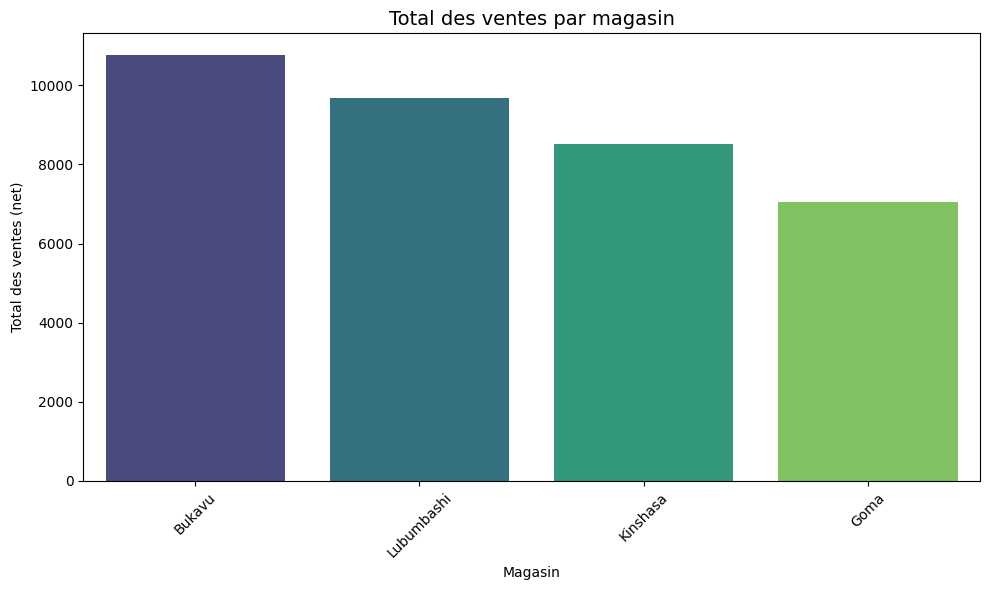

In [25]:
# Représenter graphiquement les ventes par magasin
plt.figure(figsize=(10,6))
sns.barplot(x=ventes_par_magasin.index, y=ventes_par_magasin.values, palette="viridis")
plt.title("Total des ventes par magasin", fontsize=14)
plt.xlabel("Magasin")
plt.ylabel("Total des ventes (net)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:

# Créer un bar plot des produits les plus vendus 
# Agréger la quantité totale vendue par produit
ventes_par_produit = database_1.groupby("Produit")["Quantité"].sum().sort_values(ascending=False)
ventes_par_produit = database_1.groupby("Produit")["Quantité"].sum().sort_values(ascending=False).reset_index()

C:\Users\HP\AppData\Local\Temp\ipykernel_9316\901756002.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ventes_par_produit, x="Produit", y="Quantité", palette="crest")


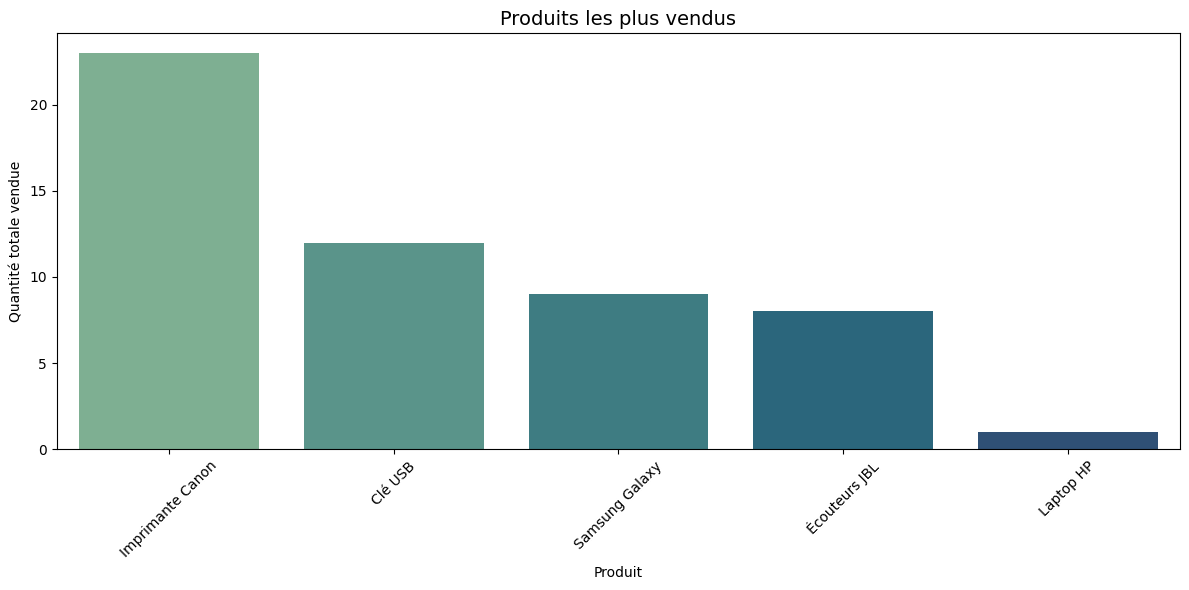

In [27]:
# Création du bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=ventes_par_produit, x="Produit", y="Quantité", palette="crest")
plt.title("Produits les plus vendus", fontsize=14)
plt.xlabel("Produit")
plt.ylabel("Quantité totale vendue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Diagramme en barres horizontal (Top 10)

In [28]:
# Top 10 produits les plus vendus
ventes_par_produit = database_1.groupby("Produit")["Quantité"].sum().sort_values(ascending=False).head(10)

C:\Users\HP\AppData\Local\Temp\ipykernel_9316\2193228611.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventes_par_produit.values, y=ventes_par_produit.index, palette="Blues_r")


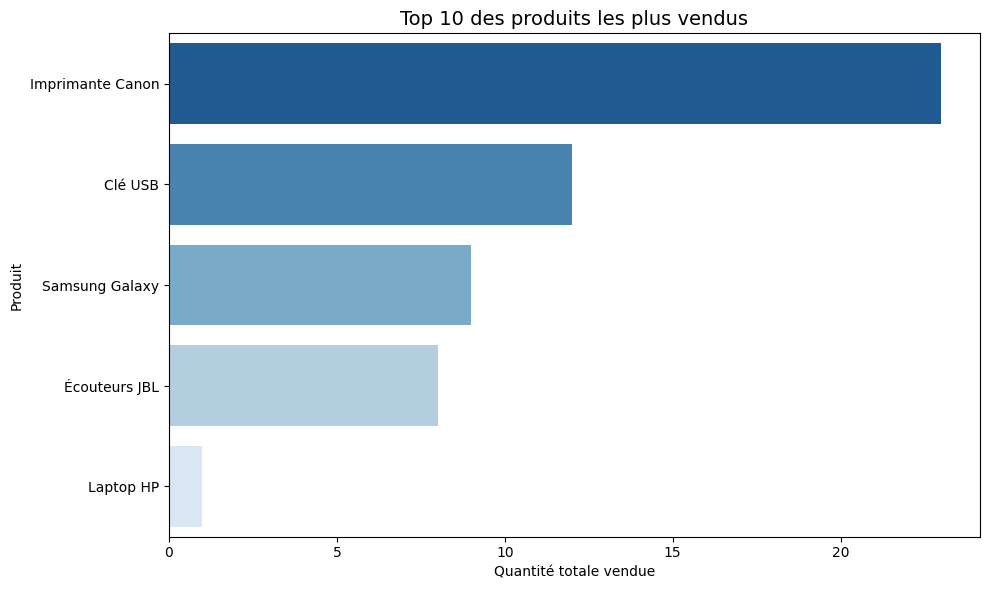

In [29]:
# Barres horizontales
plt.figure(figsize=(10, 6))
sns.barplot(x=ventes_par_produit.values, y=ventes_par_produit.index, palette="Blues_r")
plt.title("Top 10 des produits les plus vendus", fontsize=14)
plt.xlabel("Quantité totale vendue")
plt.ylabel("Produit")
plt.tight_layout()
plt.show()

## Diagramme circulaire (camembert, Top 5)

In [30]:
# Top 5 produits pour éviter surcharge visuelle
ventes_top5 = ventes_par_produit.head(5)

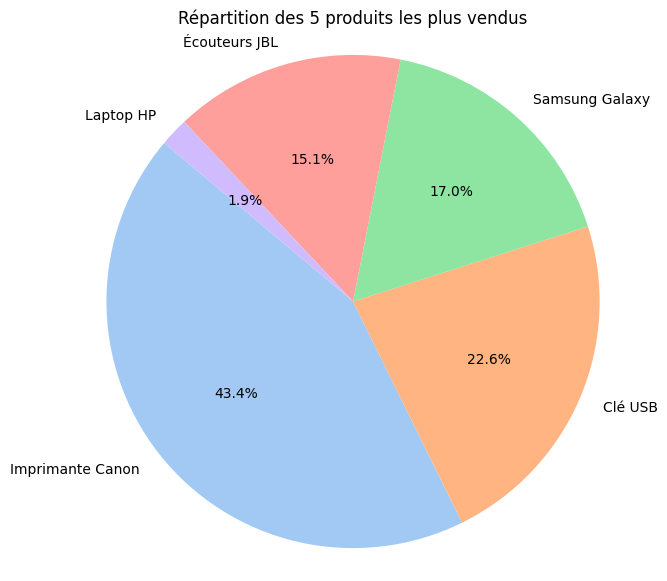

In [31]:
# Diagramme circulaire
plt.figure(figsize=(7, 7))
plt.pie(ventes_top5.values, labels=ventes_top5.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Répartition des 5 produits les plus vendus")
plt.axis('equal')  # Cercle parfait
plt.show()

## Ventes par catégorie de produit

In [32]:
# Total des ventes nettes par catégorie
ventes_par_categorie = database_1.groupby("Catégorie")["Prix_net"].sum().sort_values(ascending=False)

C:\Users\HP\AppData\Local\Temp\ipykernel_9316\3493842862.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventes_par_categorie.index, y=ventes_par_categorie.values, palette="Set2")


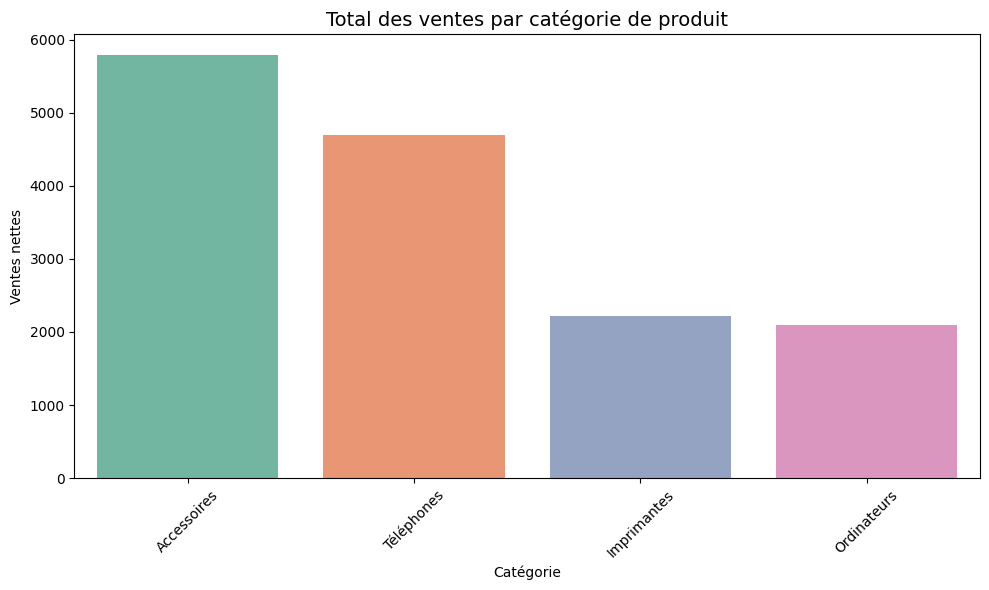

In [33]:
# Diagramme en barres
plt.figure(figsize=(10, 6))
sns.barplot(x=ventes_par_categorie.index, y=ventes_par_categorie.values, palette="Set2")

plt.title("Total des ventes par catégorie de produit", fontsize=14)
plt.xlabel("Catégorie")
plt.ylabel("Ventes nettes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Ventes par mois

In [34]:
# S'assurer que la colonne Date est bien au format datetime
database_1["Date"] = pd.to_datetime(database_1["Date"])

In [35]:
# Extraire le mois
database_1["Mois"] = database_1["Date"].dt.to_period("M")

In [36]:
# Total des ventes nettes par mois
ventes_par_mois = database_1.groupby("Mois")["Prix_net"].sum()

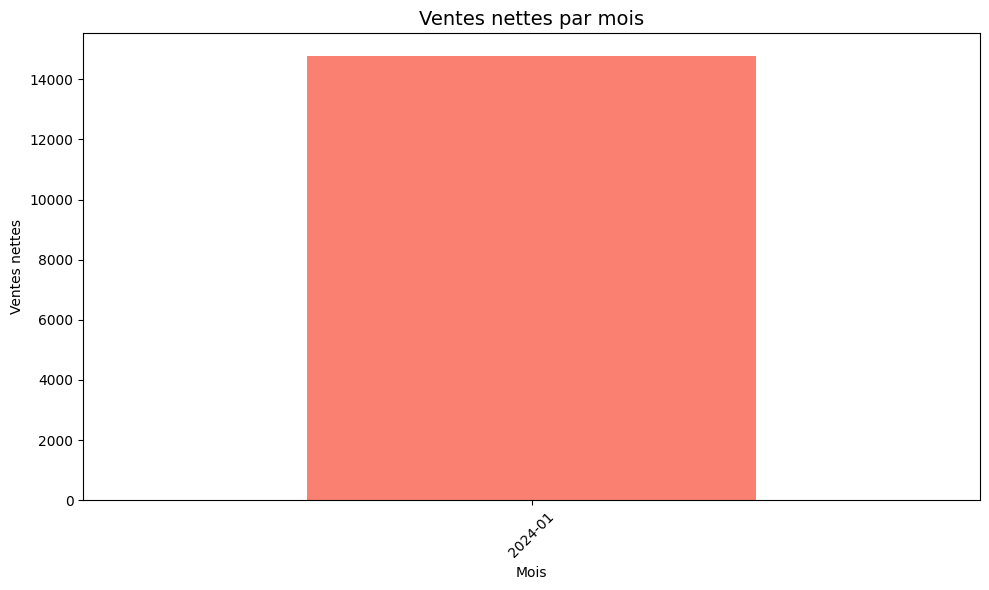

In [37]:
# Représentation graphique
plt.figure(figsize=(10, 6))
ventes_par_mois.plot(kind='bar', color='salmon')
plt.title("Ventes nettes par mois", fontsize=14)
plt.xlabel("Mois")
plt.ylabel("Ventes nettes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
